## Import Libraries

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

#do ploting inline instead of in a seperate window
%matplotlib inline

In [139]:
df = pd.read_csv('./data/DT_ice_data1.csv')
df.shape

(6, 3)

In [140]:
df.head()

,GPA,Studied,Passed
0,L,F,F
1,L,T,T
2,M,F,F
3,M,T,T
4,H,F,T


In [141]:
df.tail()

,GPA,Studied,Passed
1,L,T,T
2,M,F,F
3,M,T,T
4,H,F,T
5,H,T,T


In [142]:
passed_map = {"T": 1, "F":0}
studied_map = {"T": 1, "F":0}
gpa_map = {"L":1, "M": 2, "H": 3}

df['GPA'] = df['GPA'].map(gpa_map)
df['Studied'] = df['Studied'].map(studied_map)
df['Passed'] = df['Passed'].map(passed_map)
df.head()

,GPA,Studied,Passed
0,1,0,0
1,1,1,1
2,2,0,0
3,2,1,1
4,3,0,1


In [143]:
feature_col_names = ['GPA','Studied']
target = ['Passed']
X = df[feature_col_names].values
y = df[target].values

In [144]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0, random_state=3)

In [145]:
# create a model
d3_model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
d3_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

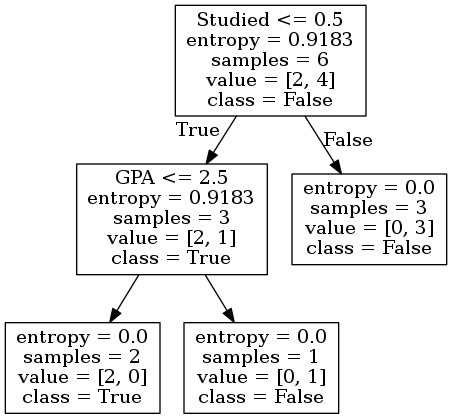

In [150]:
from IPython.display import Image 
import pydotplus

dot_data = tree.export_graphviz(d3_model, out_file=None, feature_names=feature_col_names, class_names=["True","False"])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# apt-get install graphviz
# pip3 install pydotplus